In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data1 = data.sample(n=150)

In [ ]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
169,170,Male,32,87,63
191,192,Female,32,103,69
172,173,Male,36,87,10
56,57,Female,51,44,50
79,80,Female,49,54,42


In [ ]:
data1.shape

(150, 5)

In [ ]:
data1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,150.000000,150.000000,150.000000,150.000000
mean,102.053333,38.626667,61.066667,50.826667
std,57.213223,14.013678,25.599567,26.193074
min,1.000000,18.000000,15.000000,1.000000
25%,52.250000,28.000000,42.250000,35.000000
50%,106.500000,36.000000,62.500000,52.000000
75%,147.750000,49.000000,77.000000,73.000000
max,200.000000,70.000000,137.000000,97.000000


In [ ]:
null_values = data1.isnull().sum()

In [ ]:
null_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
corr = data1.corr()
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.006060,0.980205,0.084641
Age,0.006060,1.000000,0.019900,-0.380634
Annual Income (k$),0.980205,0.019900,1.000000,0.099748
Spending Score (1-100),0.084641,-0.380634,0.099748,1.000000


<Axes: >

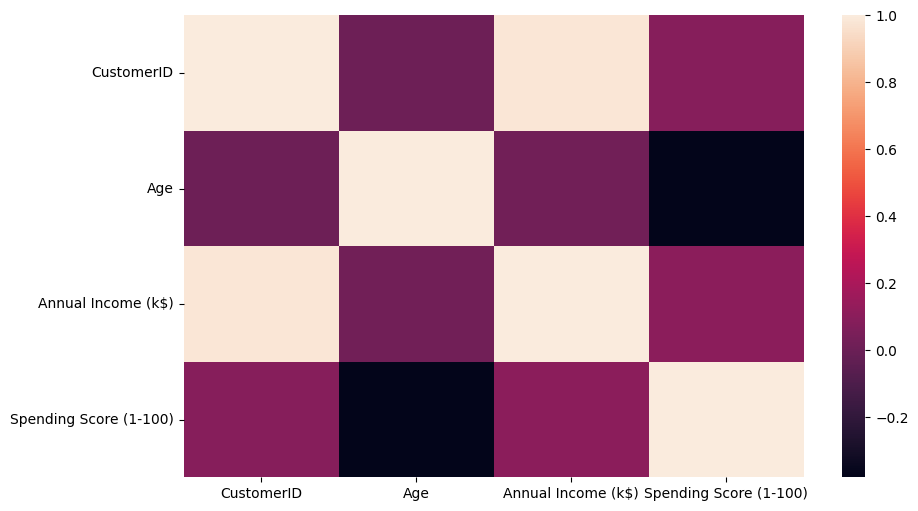

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr)
heatmap

Text(0, 0.5, 'Count')

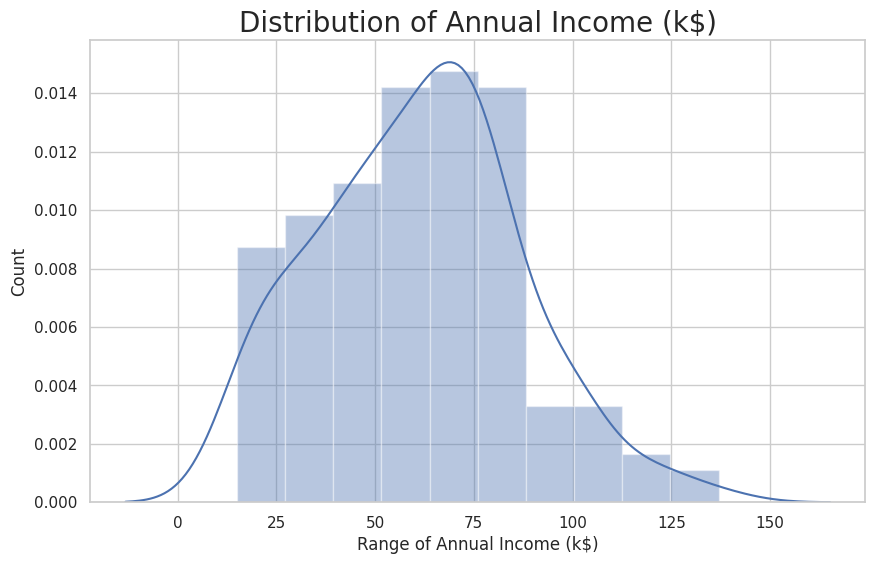

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data1['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

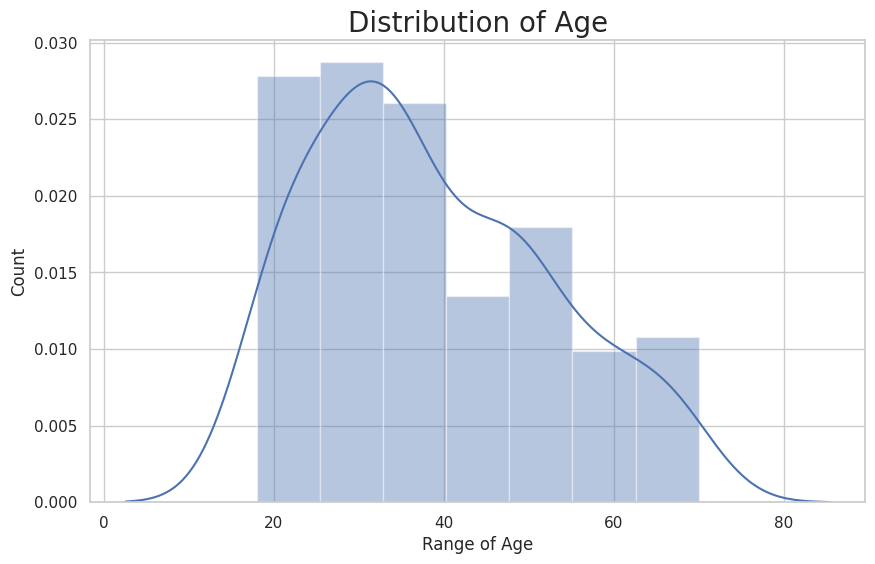

In [ ]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data1['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Mainly Annual Income falls between 50K to 85K.

Text(0, 0.5, 'Count')

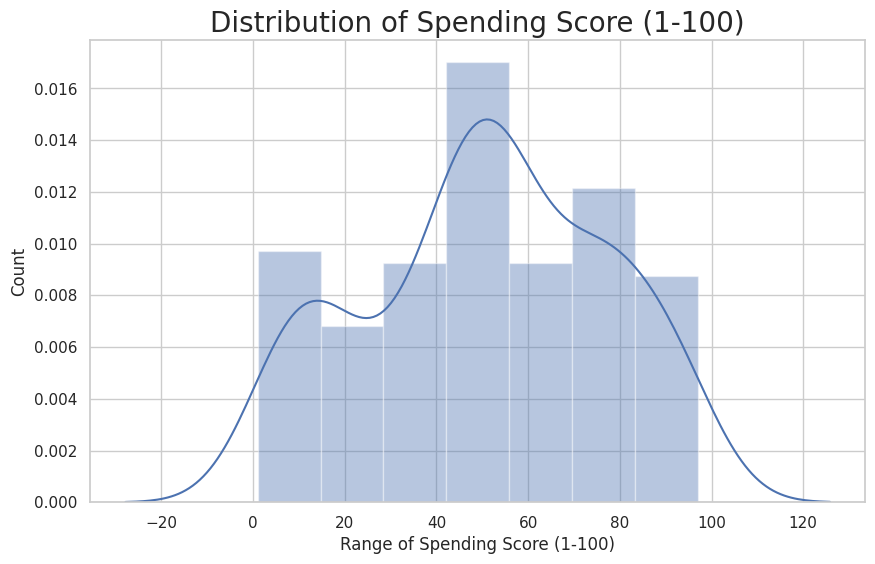

In [ ]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data1['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

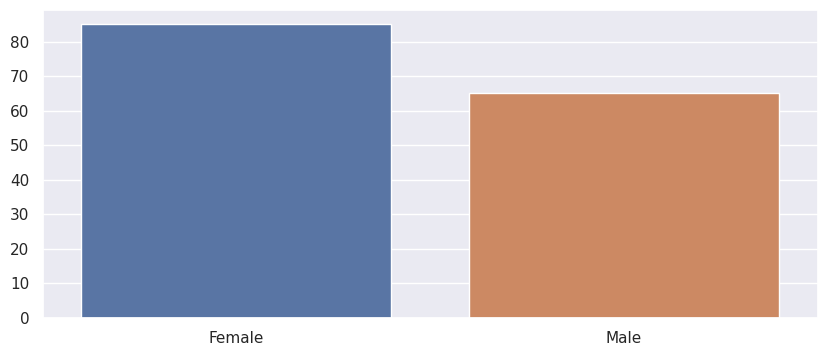

In [ ]:
genders = data1.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [ ]:
#We take just the Annual Income and Spending score
X=data1[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
169,87,63
191,103,69
172,87,10
56,44,50
79,54,42


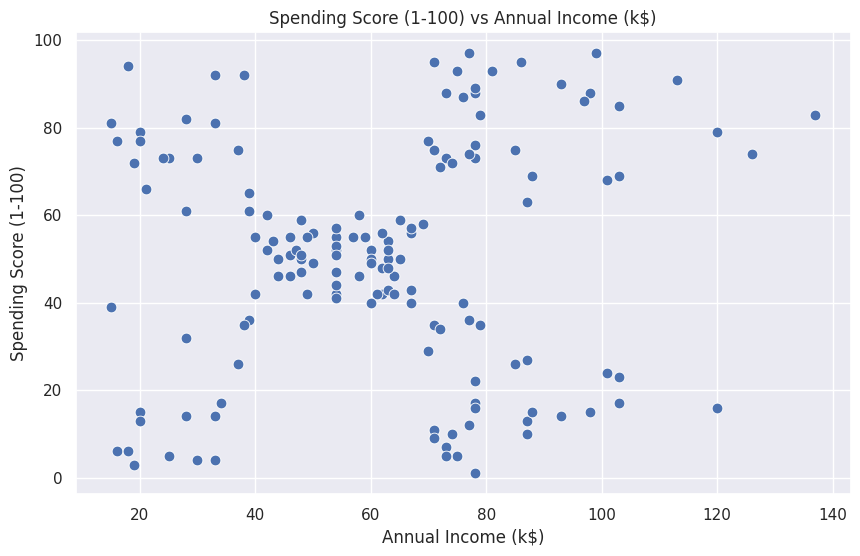

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data = X ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y = kmeans.labels_

In [ ]:
y

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
#adding the labels to a column named label
data1["label"] = y

In [ ]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
169,170,Male,32,87,63,1
191,192,Female,32,103,69,1
172,173,Male,36,87,10,0
56,57,Female,51,44,50,0
79,80,Female,49,54,42,0


Scatter Plot with Two Clusters

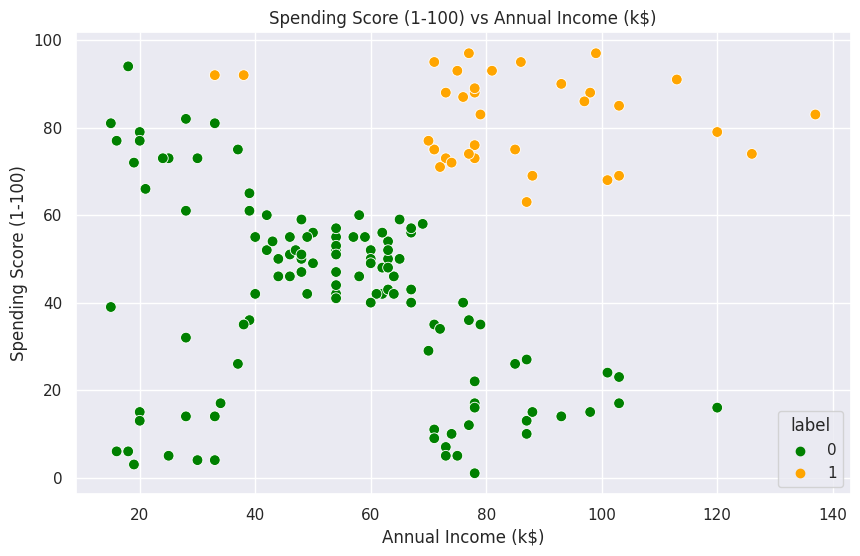

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
palette=['green','orange'], legend='full',data = data1 ,s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

WCSS to plot the Elbow Curve in order to find the Right value for K (Clusters) Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.

In [ ]:
wcss=[]
for i in range(1,21):
  km=KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)

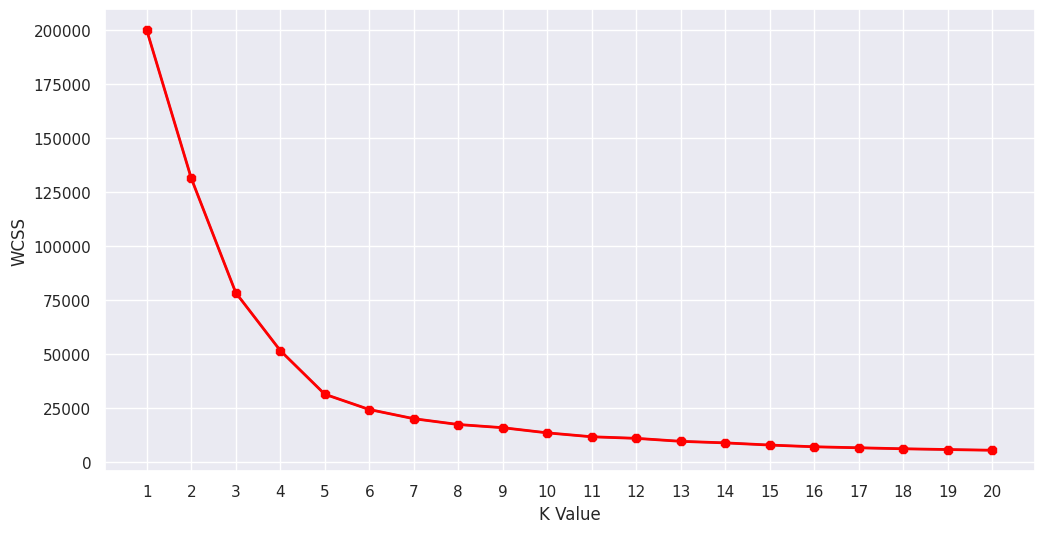

In [ ]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,21),wcss)
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

K-Means with Model Training with 5 Clusters

In [ ]:
#Taking 5 clusters
kmeans_wcss=KMeans(n_clusters=5)
kmeans_wcss.fit(X)
y=kmeans_wcss.predict(X)
data1["label"] = y
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
169,170,Male,32,87,63,1
191,192,Female,32,103,69,1
172,173,Male,36,87,10,0
56,57,Female,51,44,50,3
79,80,Female,49,54,42,3


Scatter Plot with 5 Clusters (ref. to Elbow Curve value)

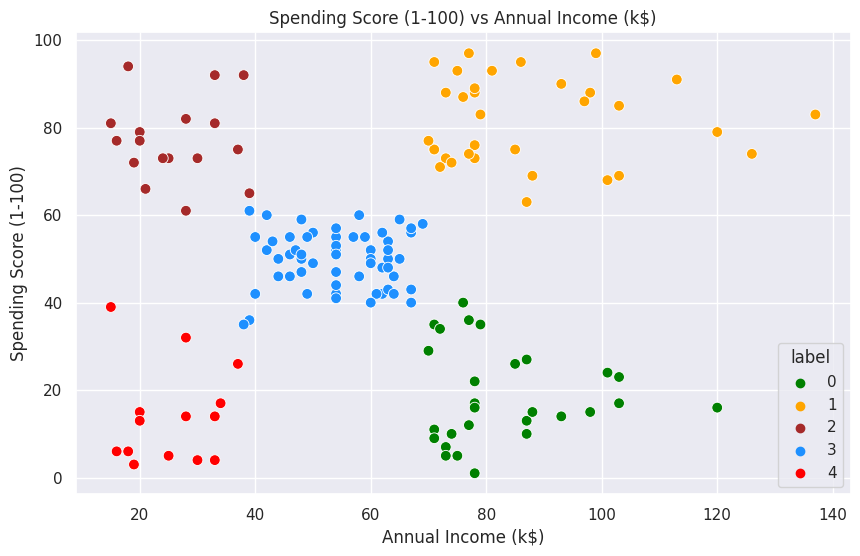

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label", palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data1 ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Using K-Means++ for Elbow Curve & finding out the difference

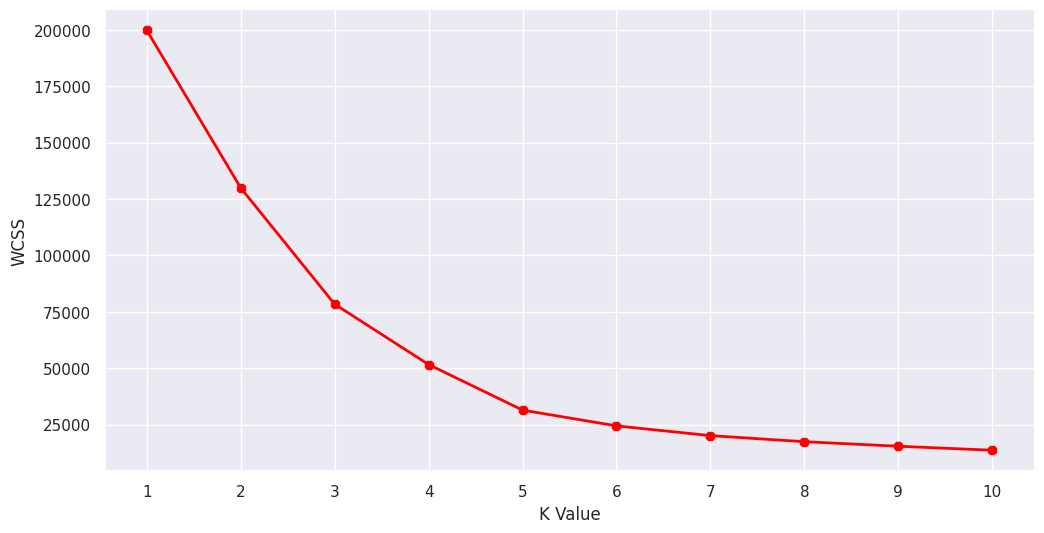

In [ ]:
#Taking the features
X1=data1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters
is taken at the elbow joint point. This point is the point where making clusters is most relevant as
here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal,
so we take 5 to be the number of clusters.


Here also we choose % clusters as per the Elbow Curve


In [ ]:
#We choose the k for which WSS starts to diminish
kmeans2 = KMeans(n_clusters=5)
y2 = kmeans2.fit_predict(X1)
data1["label"] = y2
#The data with labels
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
169,170,Male,32,87,63,1
191,192,Female,32,103,69,1
172,173,Male,36,87,10,2
56,57,Female,51,44,50,0
79,80,Female,49,54,42,0


3D Plot for the selected 3 features

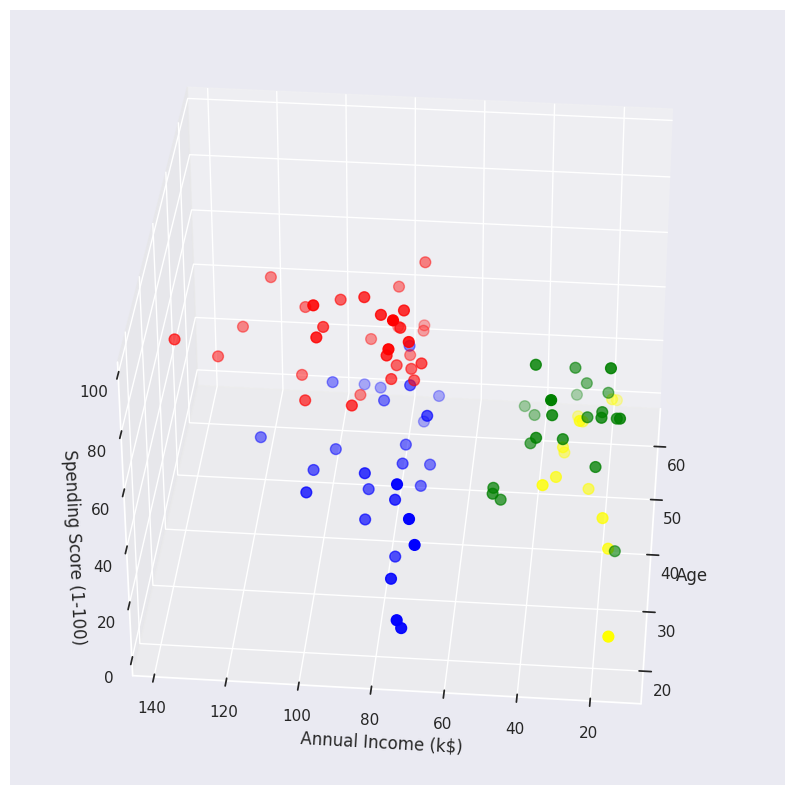

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1.Age[data1.label == 1], data1["Annual Income (k$)"][data1.label == 1], data1["Spending Score (1-100)"][data1.label == 1], c='red', s=60)
ax.scatter(data1.Age[data1.label == 2], data1["Annual Income (k$)"][data1.label == 2], data1["Spending Score (1-100)"][data1.label == 2], c='blue', s=60)
ax.scatter(data1.Age[data1.label == 3], data1["Annual Income (k$)"][data1.label == 3], data1["Spending Score (1-100)"][data1.label == 3], c='green', s=60)
ax.scatter(data1.Age[data1.label == 4], data1["Annual Income (k$)"][data1.label == 4], data1["Spending Score (1-100)"][data1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
df = data1.groupby(['label']) ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

In [ ]:
df['N obs'] = data1[['label', 'Gender']].groupby(['label']).count()

In [ ]:
df

,Age,Annual Income (k$),Spending Score (1-100),N obs
label,,,,
0,45.547170,55.207547,49.132075,53
1,32.666667,87.515152,81.545455,33
2,41.178571,82.964286,18.714286,28
3,23.913043,29.652174,71.565217,23
4,46.076923,26.230769,12.230769,13


Based on the table, it appears to show the data of individuals segmented into five
clusters (label 0, 1, 2, 3 and 4) based on their age, annual income, and spending score. Each cluster
has a different number of observations (N obs).

Here's a breakdown of the information in the dataset:

Cluster 0: Represents a group of 53 observations with an average age of approximately 45.55 years,
an average annual income of around 55.21 k$, and an average spending score of about 49.13.

Cluster 1: Represents a group of 33 observations with an average age of roughly 32.67 years,
an average annual income of approximately 87.52 k$, and an average spending score of around 81.55.

Cluster 2: Represents a group of 28 observations with an average age of about 41.18 years,
an average annual income of approximately 82.96 k$, and an average spending score of roughly 18.71.

Cluster 3: Represents a group of 23 observations with an average age of approximately 23.91 years,
an average annual income of roughly 29.65 k$, and an average spending score of around 71.57.

Cluster 4: Represents a group of 13 observations with an average age of about 46.08 years,
an average annual income of approximately 26.23 k$, and an average spending score of roughly 12.23.

Overall, understanding these clusters can help businesses tailor their marketing strategies and
product offerings to cater to the specific needs and preferences of each segment. It is crucial to
perform further analysis and conduct market research to validate these assumptions and gain
deeper insights into the behavior of each cluster before implementing marketing strategies.